In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


######################################### DATA PREPROCESSING :

In [8]:
 # importing the data:
df = pd.read_csv('Advertising.csv')
df= df[['TV' , 'Radio' , 'Newspaper' , 'Sales']]

# Checking if there is any NUlL value.
nu = df.isnull().sum()
# print(nu)

# Checking if there is any Duplicted value.
dup = df.duplicated().sum()
# print(dup)

# Scaling the Data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df = ss.fit_transform(df)
df = pd.DataFrame(df , columns=['TV' , 'Radio' , 'Newspaper' , 'Sales'])


# Making feature and Target columns.
x = df[['TV' , 'Radio' , 'Newspaper']]
y = df['Sales']


#################################################################### :DATA VISUALISATION:

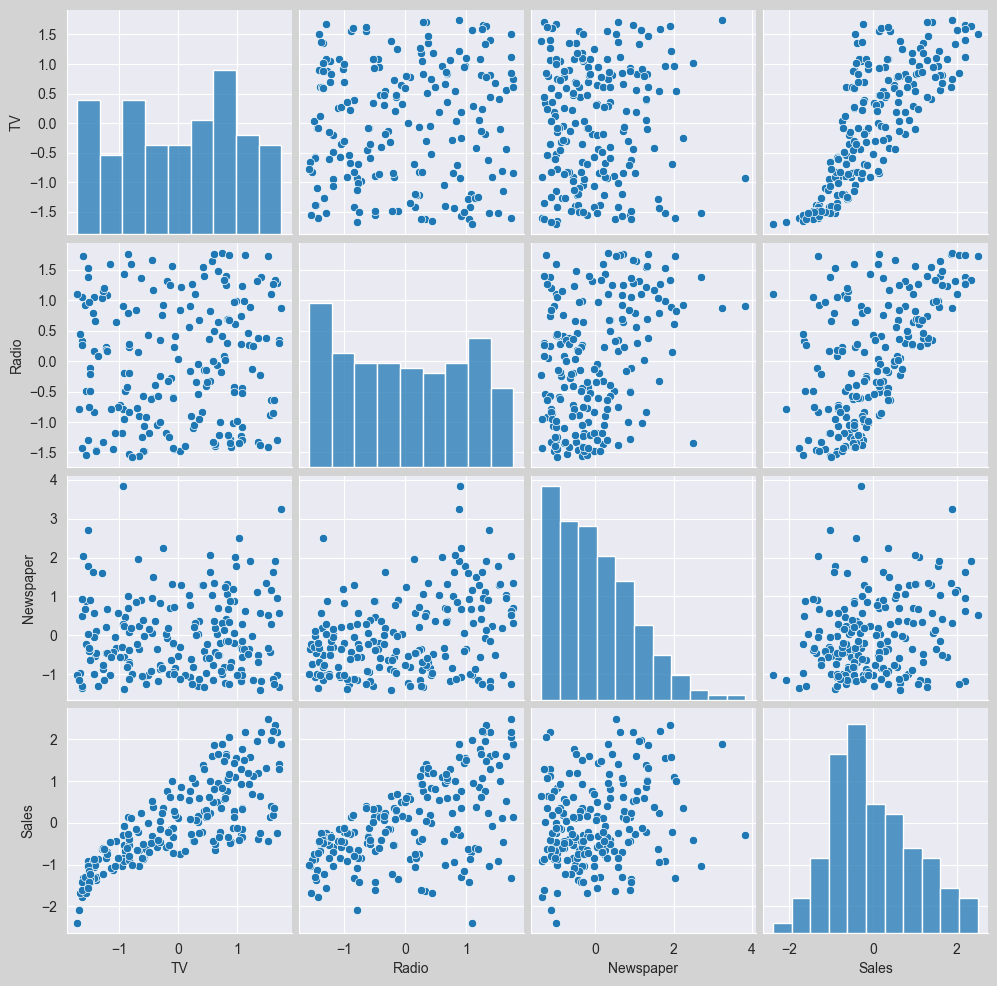

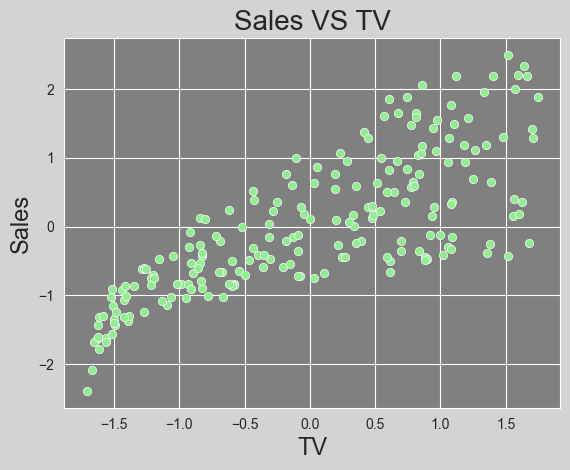

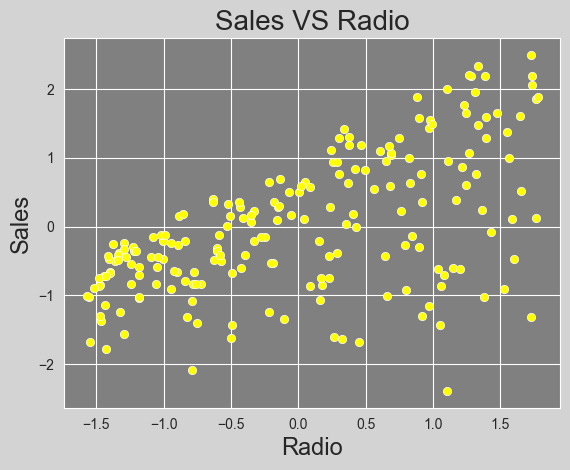

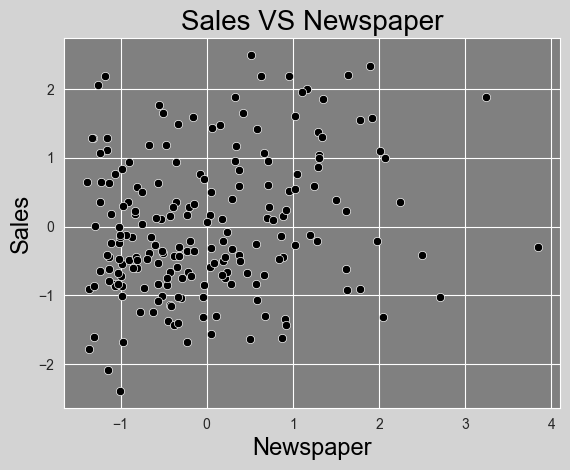

In [9]:

sns.set_style("darkgrid")
sns.pairplot(df )
plt.gcf().set_facecolor('lightgray')  # Change the figure background color
plt.gca().set_facecolor('gray')       # Change the axes background color

plt.show()

print()
print()
sns.set_style("darkgrid")
sns.scatterplot(x = x['TV'] , y = y , data = df ,color = 'lightgreen' ) 
plt.gcf().set_facecolor('lightgray')  # Change the figure background color
plt.gca().set_facecolor('gray')       # Change the axes background color
plt.xlabel('TV' , fontsize = 17)
plt.ylabel('Sales' , fontsize = 17)
plt.title('Sales VS TV' , fontsize = 20 )
plt.show()

print()
print()

sns.set_style("darkgrid")
sns.scatterplot(x = x['Radio'] , y = y , data = df ,color = 'yellow' ) 
plt.gcf().set_facecolor('lightgray')  # Change the figure background color
plt.gca().set_facecolor('gray')       # Change the axes background color
plt.xlabel('Radio' , fontsize = 17  )
plt.ylabel('Sales' , fontsize = 17 )
plt.title('Sales VS Radio' , fontsize = 20 )
plt.show()

print()
print()
sns.set_style("darkgrid")
sns.scatterplot(x = x['Newspaper'] , y = y , data = df ,color = 'black' ) 
plt.gcf().set_facecolor('lightgray')  # Change the figure background color
plt.gca().set_facecolor('gray')       # Change the axes background color
plt.xlabel('Newspaper' , fontsize = 17 , color = 'black')
plt.ylabel('Sales' , fontsize = 17 , color = 'black')
plt.title('Sales VS Newspaper' , fontsize = 20 , color = 'black' )
plt.show()

In [10]:
 # Spliting the data for training.
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=0)

# We choose Random Forest regressor .
from sklearn.ensemble import RandomForestRegressor


In [14]:

# HYPERPARAMETER TUNING USING GRIDSEARCH CV.
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators' : [100,130,150],
    'max_depth' : [7,10],
    'random_state':[0,42]
}
clf = GridSearchCV(RandomForestRegressor() ,params , cv=5 , return_train_score=False )
clf.fit(x_train , y_train)
df1 = pd.DataFrame(clf.cv_results_)
print(df1[['param_max_depth' , 'param_n_estimators' ,'param_random_state','mean_test_score']])
print()
print()
print("Best Parameters : " , clf.best_params_)
print("Best Scores :", clf.best_score_)

   param_max_depth param_n_estimators param_random_state  mean_test_score
0                7                100                  0         0.973581
1                7                100                 42         0.973418
2                7                130                  0         0.973975
3                7                130                 42         0.973054
4                7                150                  0         0.974068
5                7                150                 42         0.973544
6               10                100                  0         0.973858
7               10                100                 42         0.973387
8               10                130                  0         0.974190
9               10                130                 42         0.973051
10              10                150                  0         0.974212
11              10                150                 42         0.973687


Best Parameters :  {'max_depth': 10,

In [13]:

# We Got best parameters for our model.
# Creating the model and setting the hyperparameters.
rg = RandomForestRegressor(n_estimators=150 , max_depth=10 , random_state=0)

# Training the data.
rg.fit(x_train , y_train)

# Making predictions.
pred = rg.predict(x_test)


# Checking our model accuracy by checking :  mean squarred error , mean absolute error , r2_score .
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
ms = mean_squared_error(y_test , pred)
ma = mean_absolute_error(y_test , pred)
r = r2_score(y_test , pred)

print()
print("Mean Squarred Error :", ms)
print("Mean Absolute Error :", ma)
print("R2_score :", r)
print()


Mean Squarred Error : 0.033911868040580814
Mean Absolute Error : 0.1329559585304486
R2_score : 0.9708120621664631

